# Migraine, Oral contraceptive pill & Menstrual Study

## Information about Migraine Headaches
During the period from March 24, 2023, to August 10, 2023

## Prepared by Dr. Vitchakorn Poonyakanok (Last updated on August 12, 2023)
The data is sourced from an Excel file (.xlsx).
The raw data is contained in the 'Rawdata' sheet.

**Additional Information:**

- Migraine headaches are a common and often debilitating condition characterized by moderate to severe pain, typically on one side of the head. They can be accompanied by symptoms such as sensitivity to light and sound, nausea, and visual disturbances known as aura. The exact cause of migraines is not fully understood, but they are believed to result from a combination of genetic and environmental factors.

- Oral contraceptive pills (OCPs) are a widely used form of birth control that can have varying effects on migraines. Some individuals may experience an improvement in migraine symptoms while using OCPs, whereas others may find that their migraines become more frequent or severe. This variation is partly due to the hormonal changes induced by OCPs, which can influence migraine patterns.

This study aims to explore the potential correlation between the intensity and frequency of migraine headaches, and the use of oral contraceptive pills, particularly focusing on the menstrual cycle's role in this relationship.



## Overview
Welcome to my personal project from one of my patient. This project is a deep dive into understanding how migraine patterns might be influenced by oral contraceptives and menstrual cycles. As a medical practitioner with a keen interest in data analysis, I've embarked on this journey to explore a question that has piqued my curiosity in my everyday medical practice.

## Objective
The primary aim of this project is to analyze and identify any potential correlations between the intensity and frequency of migraine headaches, the usage of oral contraceptives, and menstrual cycle phases. This is not just a scientific endeavor but also a personal quest for answers in the realm of preventive medicine.

## Data and Methodology
- The dataset includes anonymized patient records focusing on migraine history (Migraine Diary), oral contraceptive use, and menstrual cycle details.
- The analysis involves statistical methods and data visualization techniques to uncover patterns and correlations.

## Disclaimer
This project is a personal exploration and should **NOT** be taken as medical advice. The findings and conclusions are based on the dataset at hand and are part of an ongoing learning process in the field of data analysis and medicine.

## Imports library & package

Import relevant Python libraries and packages: `numpy`, `pandas`, `seaborn`, `pyplot` from `matplotlib` and `calendar`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import scipy.stats as stats

## Load the dataset

The dataset was extracted as Excel from internal server and cleaned.  
Load the dataset `migraine-dairy.xlsx` as `df` and display the first five rows.

In [2]:
file_path = '/kaggle/input/migraine-dairy-xlsx/migraine_dairy.xlsx'
df = pd.read_excel(file_path)

## Data Transformation

### Check for missing values

In [3]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Other:    139
dtype: int64

### One-hot encode the 'Side' column:

In [4]:
# Correctly apply one-hot encoding using get_dummies without dropping any dummy variables
one_hot_encoded_side = pd.get_dummies(df['Side'], prefix='Side')

# Concatenate the one-hot encoded columns to the dataframe
df = pd.concat([df, one_hot_encoded_side], axis=1)

# Drop the original 'Side' column
df.drop('Side', axis=1, inplace=True)

In [5]:
# Explicitly convert the one-hot encoded columns to integer type
df['Side_0'] = df['Side_0'].astype(int)
df['Side_L'] = df['Side_L'].astype(int)
df['Side_R'] = df['Side_R'].astype(int)

### Sum the migraine intensity over the day:

In [6]:
df['Total Intensity'] = df[['Morning (06:00-11:59)', 'Afternoon (12:00-17:59)', 'Evening (18:00-21:59)', 'Night (22:00-05:59)']].sum(axis=1)

### Rearrange columns for better organization

In [7]:
cols = ['Day', 'Total Intensity'] + [col for col in df if col not in ['Day', 'Total Intensity']]
df = df[cols]

## Data Info

In [8]:
df.head()

,Day,Total Intensity,Morning (06:00-11:59),Afternoon (12:00-17:59),Evening (18:00-21:59),Night (22:00-05:59),Duration (hours),Nasuea,Throbbing,Inability to work/function,...,Ibuprofen (400),Domperidone (10),Metoclopramide (10),Naproxen,Diclofenac(25),Flunarizine (5),Topiramate (25),Side_0,Side_L,Side_R
0,2023-03-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2023-03-25,3,0,0,3,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2023-03-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2023-03-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2023-03-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Day                         139 non-null    datetime64[ns]
 1   Total Intensity             139 non-null    int64         
 2   Morning (06:00-11:59)       139 non-null    int64         
 3   Afternoon (12:00-17:59)     139 non-null    int64         
 4   Evening (18:00-21:59)       139 non-null    int64         
 5   Night (22:00-05:59)         139 non-null    int64         
 6   Duration (hours)            139 non-null    int64         
 7   Nasuea                      139 non-null    int64         
 8   Throbbing                   139 non-null    int64         
 9   Inability to work/function  139 non-null    int64         
 10  Other:                      0 non-null      float64       
 11  Yazmin-21                   139 non-null    int64         

## Descriptive Statistics

In [10]:
df.describe()

,Day,Total Intensity,Morning (06:00-11:59),Afternoon (12:00-17:59),Evening (18:00-21:59),Night (22:00-05:59),Duration (hours),Nasuea,Throbbing,Inability to work/function,...,Ibuprofen (400),Domperidone (10),Metoclopramide (10),Naproxen,Diclofenac(25),Flunarizine (5),Topiramate (25),Side_0,Side_L,Side_R
count,139,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,...,139.000000,139.0,139.0,139.000000,139.000000,139.0,139.0,139.000000,139.000000,139.000000
mean,2023-06-01 00:00:00,0.633094,0.014388,0.366906,0.158273,0.093525,0.525180,0.0,0.021583,0.007194,...,0.071942,0.0,0.0,0.014388,0.014388,0.0,0.0,0.884892,0.035971,0.079137
min,2023-03-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,2023-04-27 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000
50%,2023-06-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000
75%,2023-07-05 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000
max,2023-08-09 00:00:00,10.000000,2.000000,8.000000,5.000000,5.000000,15.000000,0.0,1.000000,1.000000,...,2.000000,0.0,0.0,2.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000
std,NaN,1.937965,0.169638,1.314048,0.734837,0.647090,2.054796,0.0,0.145842,0.084819,...,0.285908,0.0,0.0,0.169638,0.119517,0.0,0.0,0.320306,0.186892,0.270928


## Frequency of Migraines

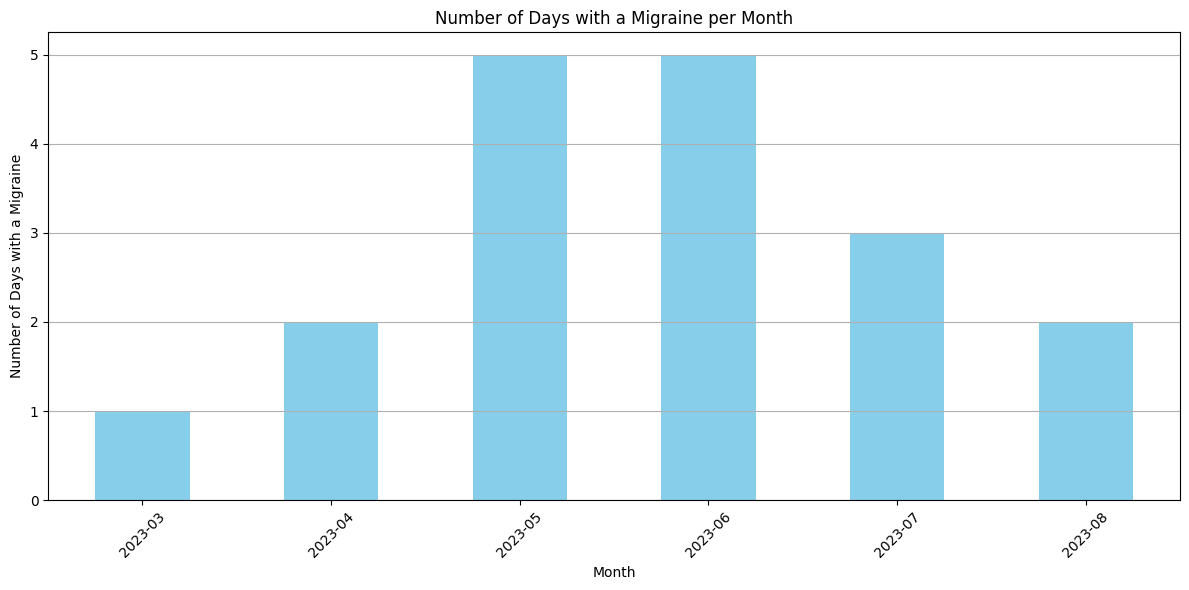

In [11]:
import matplotlib.pyplot as plt

# Extract month and year from the 'Day' column for grouping
df['YearMonth'] = df['Day'].dt.to_period('M')

# Calculate number of days with a migraine for each month
migraine_frequency = df[df['Total Intensity'] > 0].groupby('YearMonth').size()

# Plotting
plt.figure(figsize=(12, 6))
migraine_frequency.plot(kind='bar', color='skyblue')
plt.title('Number of Days with a Migraine per Month')
plt.xlabel('Month')
plt.ylabel('Number of Days with a Migraine')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

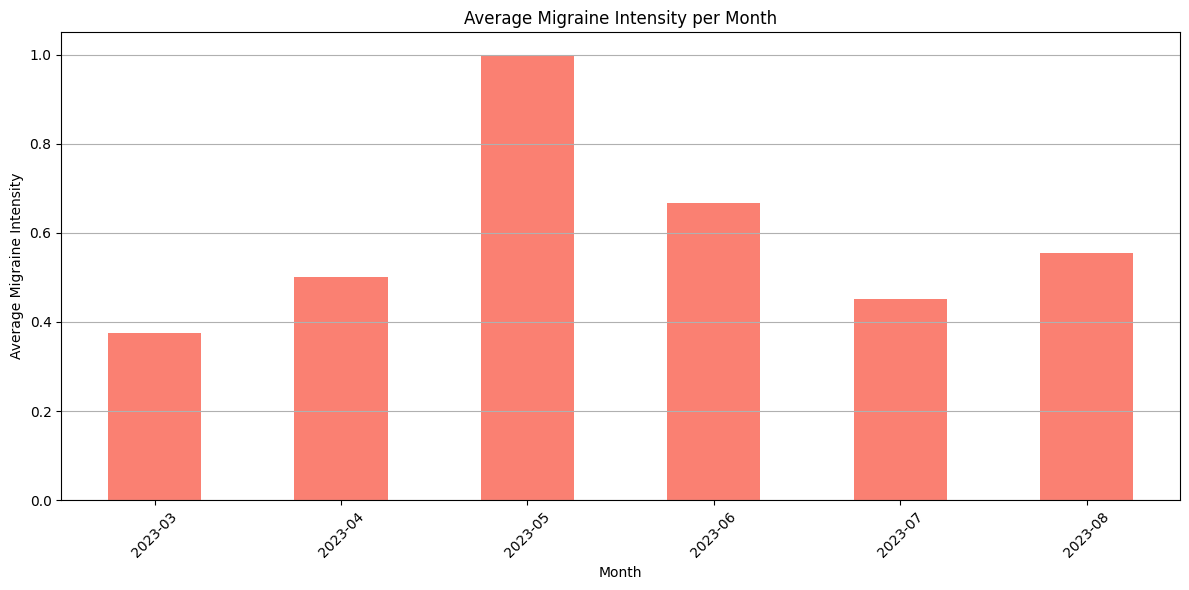

In [12]:
# Calculate average migraine intensity for each month
average_intensity = df.groupby('YearMonth')['Total Intensity'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_intensity.plot(kind='bar', color='salmon')
plt.title('Average Migraine Intensity per Month')
plt.xlabel('Month')
plt.ylabel('Average Migraine Intensity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

## Migraine Duration Analysis

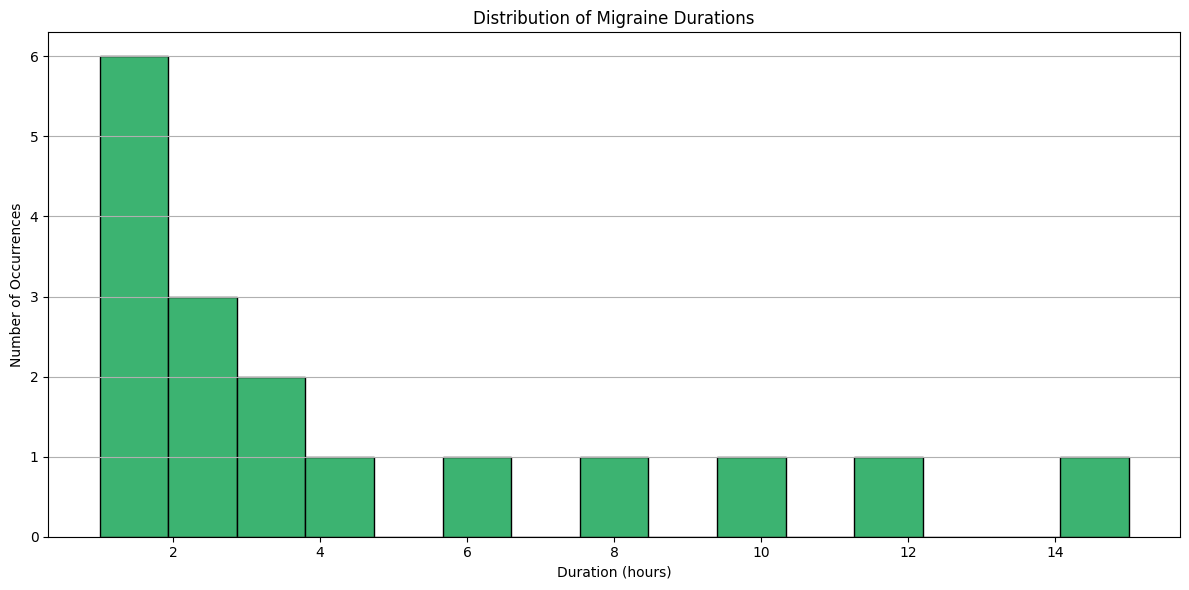

In [13]:
# Filtering out entries with a duration of 0
filtered_durations = df[df['Duration (hours)'] > 0]['Duration (hours)']

# Plotting the distribution of non-zero migraine durations
plt.figure(figsize=(12, 6))
filtered_durations.plot(kind='hist', bins=15, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Migraine Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Number of Occurrences')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

## Symptom Analysis

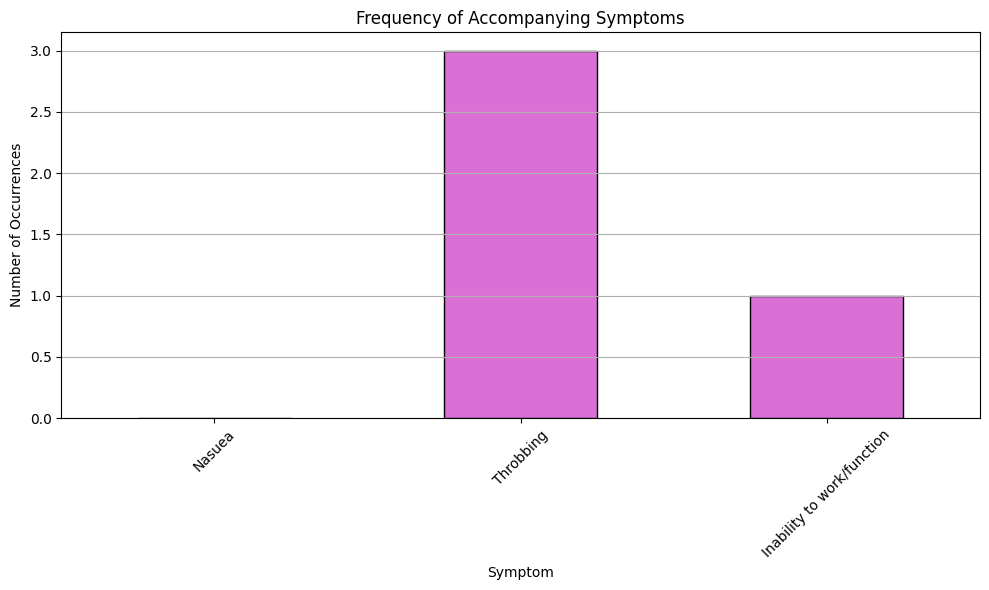

In [14]:
# List of symptoms
symptoms = ['Nasuea', 'Throbbing', 'Inability to work/function']

# Calculate frequency of each symptom
symptom_counts = df[symptoms].sum()

# Plotting
plt.figure(figsize=(10, 6))
symptom_counts.plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Frequency of Accompanying Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

## Medication Analysis

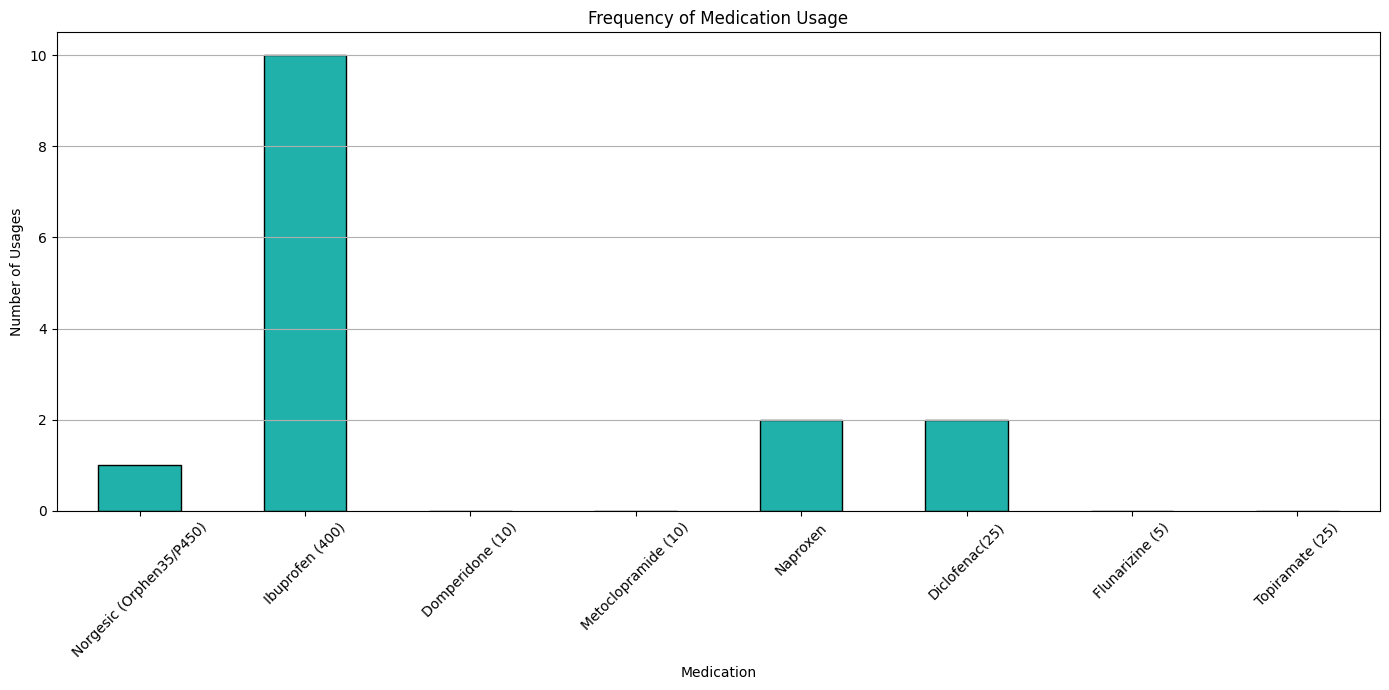

In [15]:
# List of medications
medications = [
    'Paracetamol (500 mg)', 'Betahistine (16)', 'Norgesic (Orphen35/P450)', 
    'Ibuprofen (400)', 'Domperidone (10)', 'Metoclopramide (10)', 
    'Naproxen', 'Diclofenac(25)', 'Flunarizine (5)', 'Topiramate (25)'
]

# Filter out non-existent medication columns
existing_medications = [med for med in medications if med in df.columns]

# Calculate frequency of each existing medication's usage
medication_counts_corrected = df[existing_medications].sum()

# Plotting the frequency of medication usage
plt.figure(figsize=(14, 7))
medication_counts_corrected.plot(kind='bar', color='lightseagreen', edgecolor='black')
plt.title('Frequency of Medication Usage')
plt.xlabel('Medication')
plt.ylabel('Number of Usages')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


## Side Analysis

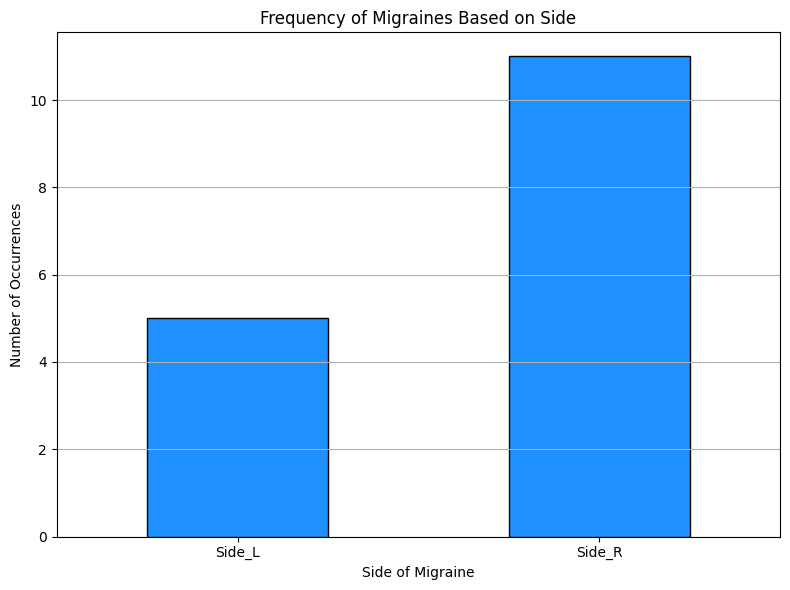

In [16]:
# Calculate frequency of migraines based on their occurrence side
side_counts = df[['Side_L', 'Side_R']].sum()

# Plotting the frequency of migraines based on side
plt.figure(figsize=(8, 6))
side_counts.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Frequency of Migraines Based on Side')
plt.xlabel('Side of Migraine')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

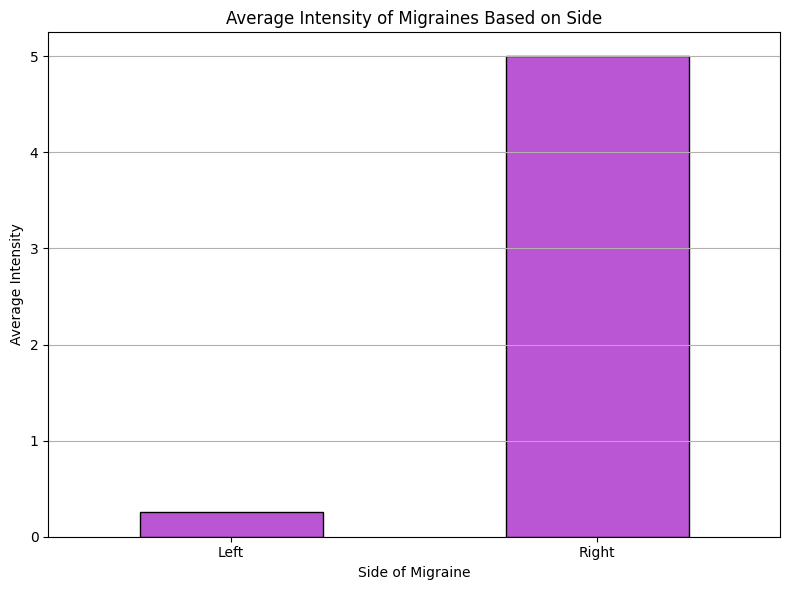

In [17]:
# Calculate average intensity of migraines based on their occurrence side
average_intensity_side = df.groupby(df['Side_R'].replace({0: 'Left', 1: 'Right'}))['Total Intensity'].mean()

# Plotting the average intensity of migraines based on side
plt.figure(figsize=(8, 6))
average_intensity_side.plot(kind='bar', color='mediumorchid', edgecolor='black')
plt.title('Average Intensity of Migraines Based on Side')
plt.xlabel('Side of Migraine')
plt.ylabel('Average Intensity')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

## Daily Pattern Analysis:

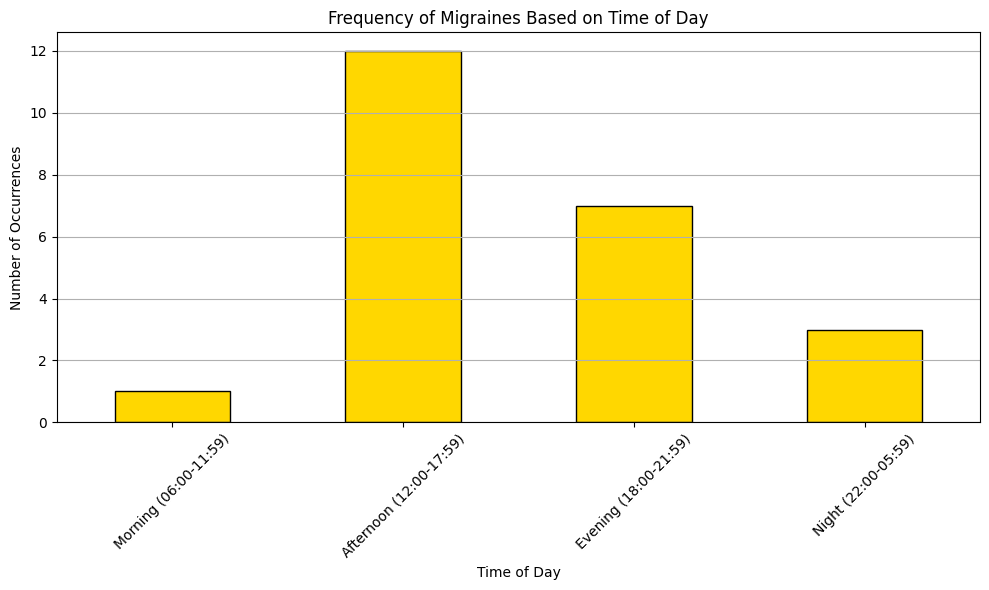

In [18]:
# Define the times of the day
times_of_day = ['Morning (06:00-11:59)', 'Afternoon (12:00-17:59)', 'Evening (18:00-21:59)', 'Night (22:00-05:59)']

# Calculate frequency of migraines for each time of the day
migraine_frequency_time_of_day = df[times_of_day].apply(lambda x: x > 0).sum()

# Plotting the frequency of migraines based on time of day
plt.figure(figsize=(10, 6))
migraine_frequency_time_of_day.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Frequency of Migraines Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

## Trend over Time

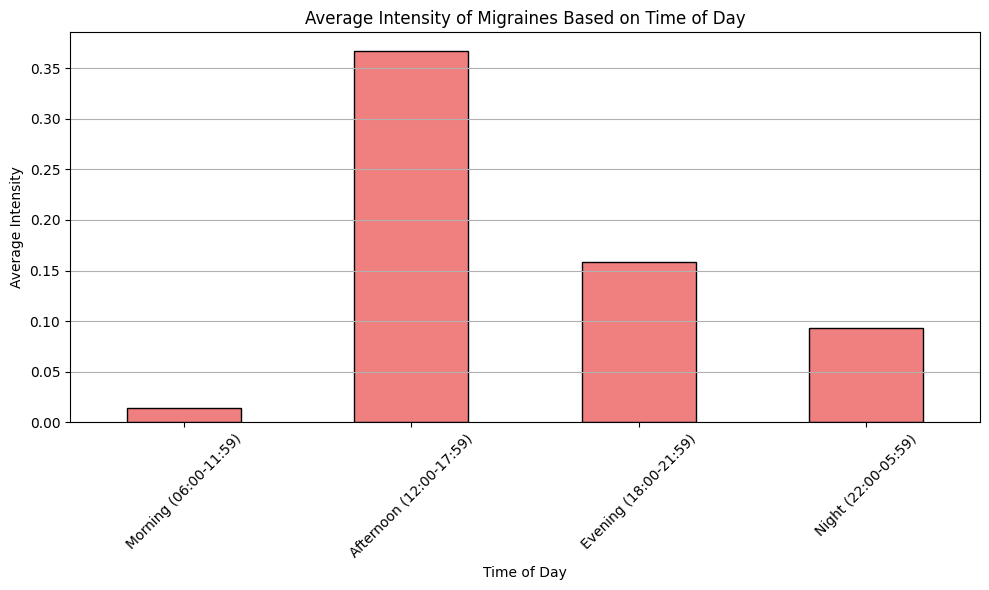

In [19]:
# Calculate average intensity of migraines for each time of the day
average_intensity_time_of_day = df[times_of_day].mean()

# Plotting the average intensity of migraines based on time of day
plt.figure(figsize=(10, 6))
average_intensity_time_of_day.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Intensity of Migraines Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Intensity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

## Contraceptive pill and Menstruation

### Correlation Analysis

In [20]:
# Keep the value of 2 in 'Yazmin-21' column to distinguish between single and double dosages

# Convert 'M' to 1 in the 'Menstruation' column and ensure all other values are 0
df['Menstruation'] = df['Menstruation'].apply(lambda x: 1 if x == 'M' else 0)

# Calculate correlation between "Yazmin-21" or "Menstruation" and "Total Intensity"
correlation_yazmin = df['Yazmin-21'].corr(df['Total Intensity'])
correlation_menstruation = df['Menstruation'].corr(df['Total Intensity'])

correlation_yazmin, correlation_menstruation

(0.06477007796341464, 0.06248058785408564)

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

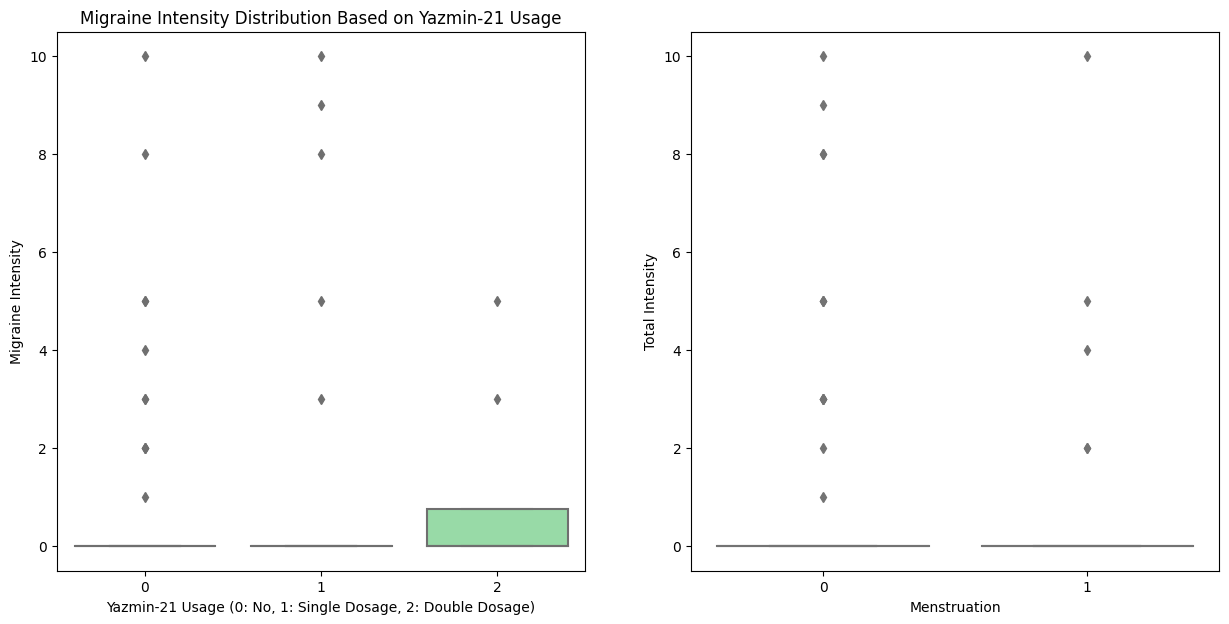

In [21]:
import seaborn as sns

# Visualization: Boxplots
plt.figure(figsize=(15, 7))

# Boxplot for Yazmin-21
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Yazmin-21'], y=df['Total Intensity'], palette="pastel")
plt.title('Migraine Intensity Distribution Based on Yazmin-21 Usage')
plt.xlabel('Yazmin-21 Usage (0: No, 1: Single Dosage, 2: Double Dosage)')
plt.ylabel('Migraine Intensity')

# Boxplot for Menstruation
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Menstruation'], y=df['Total Intensity'], palette="pastel")
plt.title

### Independent samples t-test

In [22]:
# Set significant level
singnificance_level = 0.05

  **Based on Yazmin-21 Usage:**
* Migraine intensities on days with a single dosage of Yazmin-21 vs. days without using Yazmin-21.
    - $H_0$: The mean migraine intensity on days with **any dosage** of Yazmin-21 (either single or double) is equal to the mean migraine intensity on days without using Yazmin-21.
    - $H_A$: The mean migraine intensity on days with a single dosage of Yazmin-21 is not equal to the mean migraine intensity on days without using Yazmin-21.
  
**Based on Menstruation:**
* Migraine intensities on days with menstruation vs. days without menstruation.
    - $H_0$: The mean migraine intensity on days with menstruation is equal to the mean migraine intensity on days without menstruation.
    - $H_A$: The mean migraine intensity on days with menstruation is not equal to the mean migraine intensity on days without menstruation.

In [23]:
from scipy.stats import ttest_ind

# Data for t-test
intensity_no_yazmin = df[df['Yazmin-21'] == 0]['Total Intensity']
intensity_any_dosage_yazmin = df['Total Intensity'][df['Yazmin-21'] > 0]

intensity_no_menstruation = df[df['Menstruation'] == 0]['Total Intensity']
intensity_with_menstruation = df[df['Menstruation'] == 1]['Total Intensity']

# Perform t-tests
t_stat_yazmin, p_val_yazmin = ttest_ind(intensity_no_yazmin, intensity_any_dosage_yazmin)
t_stat_menstruation, p_val_menstruation = ttest_ind(intensity_no_menstruation, intensity_with_menstruation)

In [24]:
# Creating a DataFrame to display the results of the t-tests for Yazmin and Menstruation with migraine intensities
correlation_results = pd.DataFrame({
    'Factor': ['Yazmin-21', 'Menstruation'],
    'Correlation with Intensity': [correlation_yazmin, correlation_menstruation],
    't-statistic': [t_stat_yazmin, t_stat_menstruation],
    'p-value': [p_val_yazmin, p_val_menstruation]
})

correlation_results

,Factor,Correlation with Intensity,t-statistic,p-value
0,Yazmin-21,0.064770,-0.672086,0.502661
1,Menstruation,0.062481,-0.732748,0.464964


In both cases, since the $p$-values were greater than 0.05, we failed to reject the null hypothesis ($H_0$), suggesting that there's no statistically significant difference in the means of the two compared groups.

Indicated no significant differences in migraine intensities based on Yazmin-21 usage or menstruation occurrence.

## Medications

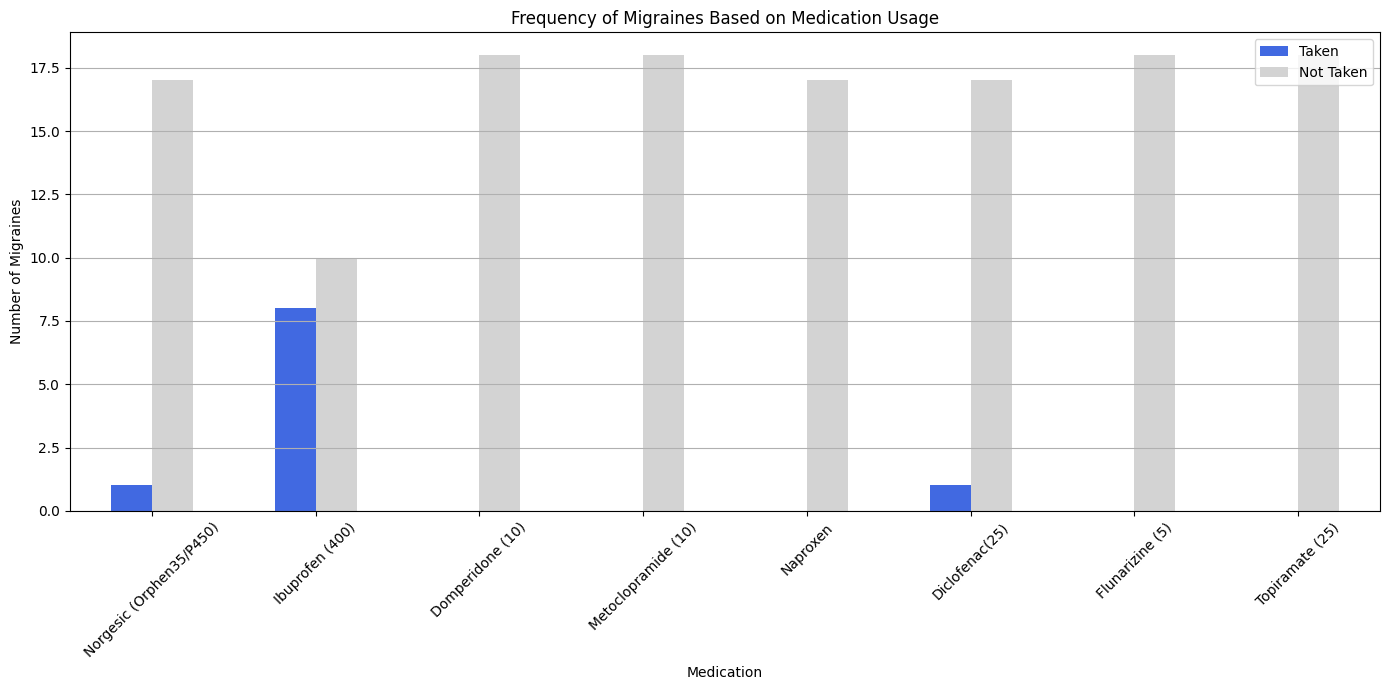

In [25]:
# Calculate the frequency of migraines on days when each medication is taken
medication_frequency_taken = df[existing_medications].apply(lambda x: (df['Total Intensity'] > 0) & (x == 1)).sum()

# Calculate the frequency of migraines on days when each medication is not taken
medication_frequency_not_taken = df[existing_medications].apply(lambda x: (df['Total Intensity'] > 0) & (x == 0)).sum()

# Combine the frequencies for visualization
medication_frequency_df = pd.DataFrame({
    'Taken': medication_frequency_taken,
    'Not Taken': medication_frequency_not_taken
})

# Plotting the frequency reduction based on medication usage
plt.figure(figsize=(14, 7))
medication_frequency_df.plot(kind='bar', ax=plt.gca(), color=['royalblue', 'lightgray'])
plt.title('Frequency of Migraines Based on Medication Usage')
plt.xlabel('Medication')
plt.ylabel('Number of Migraines')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

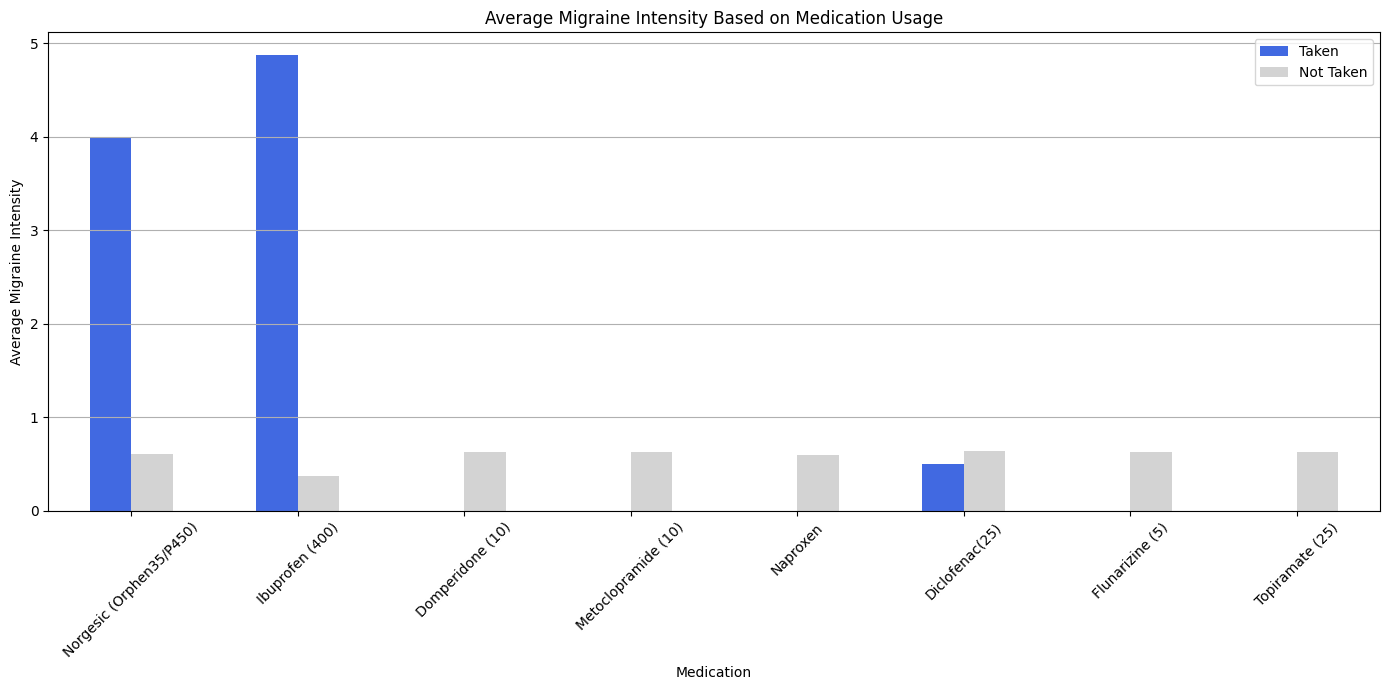

In [26]:
# Calculate the average intensity of migraines on days when each medication is taken
average_intensity_taken = df[existing_medications].apply(lambda x: df['Total Intensity'][x == 1]).mean()

# Calculate the average intensity of migraines on days when each medication is not taken
average_intensity_not_taken = df[existing_medications].apply(lambda x: df['Total Intensity'][x == 0]).mean()

# Combine the average intensities for visualization
average_intensity_df = pd.DataFrame({
    'Taken': average_intensity_taken,
    'Not Taken': average_intensity_not_taken
})

# Plotting the intensity reduction based on medication usage
plt.figure(figsize=(14, 7))
average_intensity_df.plot(kind='bar', ax=plt.gca(), color=['royalblue', 'lightgray'])
plt.title('Average Migraine Intensity Based on Medication Usage')
plt.xlabel('Medication')
plt.ylabel('Average Migraine Intensity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

### Comparing the migraine intensities on days when each medication is taken versus days when it's not taken

In [27]:
# Perform t-tests for each medication comparing migraine intensities on days when the medication is taken vs. not taken
t_stat_intensities = {}
p_val_intensities = {}

for med in existing_medications:
    intensity_taken = df['Total Intensity'][df[med] == 1]
    intensity_not_taken = df['Total Intensity'][df[med] == 0]
    
    t_stat, p_val = ttest_ind(intensity_taken, intensity_not_taken, equal_var=False, nan_policy='omit')
    
    t_stat_intensities[med] = t_stat
    p_val_intensities[med] = p_val

# Convert results to a DataFrame for better visualization
intensity_ttest_results = pd.DataFrame({
    't-statistic': t_stat_intensities,
    'p-value': p_val_intensities
})

intensity_ttest_results.sort_values(by='p-value')

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,t-statistic,p-value
Ibuprofen (400),4.501617,0.002543
Diclofenac(25),-0.256209,0.833841
Norgesic (Orphen35/P450),NaN,NaN
Domperidone (10),NaN,NaN
Metoclopramide (10),NaN,NaN
Naproxen,NaN,NaN
Flunarizine (5),NaN,NaN
Topiramate (25),NaN,NaN


### Comparing the migraine durations on days when each medication is taken versus days when it's not taken

In [28]:
# Perform t-tests for each medication comparing migraine durations on days when the medication is taken vs. not taken
t_stat_durations = {}
p_val_durations = {}

for med in existing_medications:
    duration_taken = df['Duration (hours)'][(df[med] == 1) & (df['Duration (hours)'] > 0)]
    duration_not_taken = df['Duration (hours)'][(df[med] == 0) & (df['Duration (hours)'] > 0)]
    
    t_stat, p_val = ttest_ind(duration_taken, duration_not_taken, equal_var=False, nan_policy='omit')
    
    t_stat_durations[med] = t_stat
    p_val_durations[med] = p_val

# Convert results to a DataFrame for better visualization
duration_ttest_results = pd.DataFrame({
    't-statistic': t_stat_durations,
    'p-value': p_val_durations
})

duration_ttest_results.sort_values(by='p-value')

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,t-statistic,p-value
Ibuprofen (400),-1.895725,0.083255
Norgesic (Orphen35/P450),NaN,NaN
Domperidone (10),NaN,NaN
Metoclopramide (10),NaN,NaN
Naproxen,NaN,NaN
Diclofenac(25),NaN,NaN
Flunarizine (5),NaN,NaN
Topiramate (25),NaN,NaN


## Day-of-Week Patterns

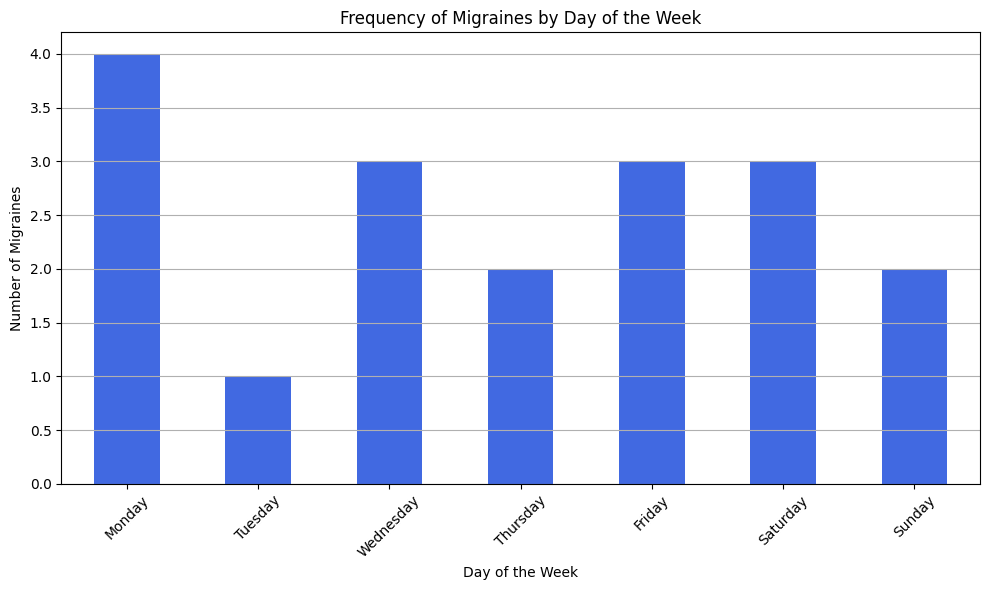

In [29]:
# Assigning days of the week based on the "Day" column, assuming the data starts on a Monday
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Extracting the day of the week directly from the 'Day' column
df['Day_of_Week'] = df['Day'].dt.day_name()

# Grouping by the day of the week and counting the number of migraine occurrences (intensity > 0)
migraine_by_day = df[df['Total Intensity'] > 0]['Day_of_Week'].value_counts().reindex(days_of_week)

# Plotting
plt.figure(figsize=(10, 6))
migraine_by_day.plot(kind='bar', color='royalblue')
plt.title('Frequency of Migraines by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Migraines')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


* **Observed Frequencies**: The number of migraines occurring on each day of the week.
* **Expected Frequencies**: The number of migraines we'd expect on each day of the week if migraines were equally likely on all days.  
  
**Hypotheses**:
* $H_0$: The day of the week is independent of the occurrence of migraines. (No association)
* $H_A$: The day of the week is not independent of the occurrence of migraines. (There is an association)

In [30]:
from scipy.stats import chi2_contingency

# Creating a contingency table
# Observed frequencies: Number of migraines on each day of the week
observed_frequencies = df[df['Total Intensity'] > 0]['Day_of_Week'].value_counts().reindex(days_of_week)

# Expected frequencies: If migraines were equally likely on all days
expected_frequencies = [observed_frequencies.sum() / 7] * 7

# Performing the chi-squared test
chi2_stat, p_val, _, _ = chi2_contingency([observed_frequencies, expected_frequencies])

chi2_stat, p_val

(1.2437458193979936, 0.9746688606046648)

## Duration vs. Intensity

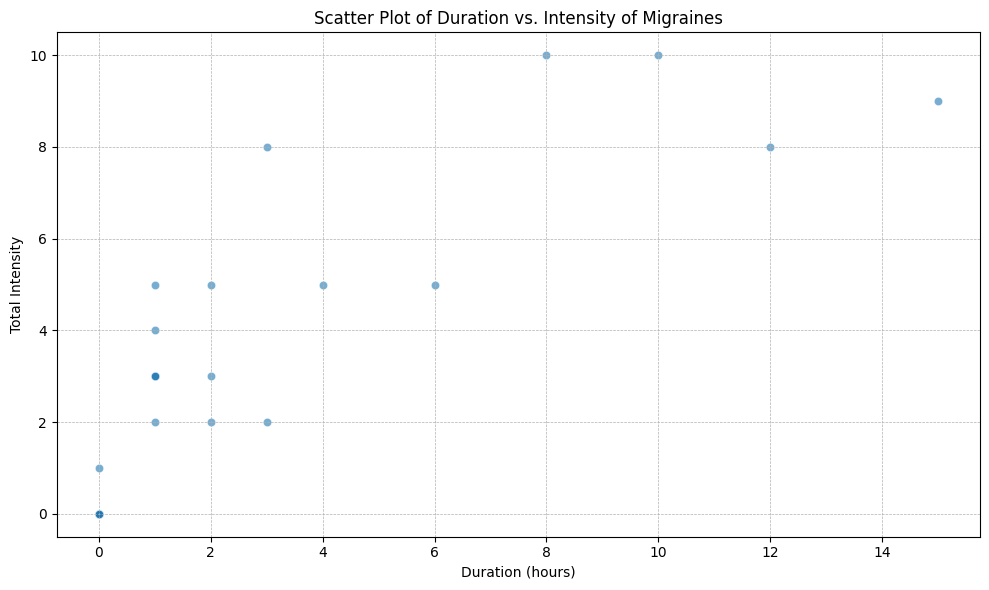

0.8821748102534281

In [31]:
# Scatter plot of Duration vs. Intensity
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (hours)'], df['Total Intensity'], alpha=0.6, edgecolors="w", linewidth=0.5)
plt.title('Scatter Plot of Duration vs. Intensity of Migraines')
plt.xlabel('Duration (hours)')
plt.ylabel('Total Intensity')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Computing the correlation coefficient
correlation_duration_intensity = df['Duration (hours)'].corr(df['Total Intensity'])

plt.show()

correlation_duration_intensity

## Cluster Analysis

## Multivariable Regression Analysis

In [32]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cleaning the data by encoding 'M' as 1 in the 'Menstruation' column
df['Menstruation'] = df['Menstruation'].replace({'M': 1})

# Cleaning the data
df['Yazmin-21'] = df['Yazmin-21'].replace({'Yes-2': 2, 'Yes-1': 1, 'No': 0})
df['Menstruation'] = df['Menstruation'].replace({'Yes': 1, 'No': 0})
df['Migraine_Occurrence'] = (df['Total Intensity'] > 0).astype(int)

# Selecting the independent variables and dependent variable
X = df[['Yazmin-21', 'Menstruation']]
y = df['Migraine_Occurrence']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the multivariable linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Model coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Model evaluation on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients, intercept, mse, r2


(array([-0.01196304,  0.03096316]),
 0.10757557214539226,
 0.17883688441265416,
 -0.06218270742061227)

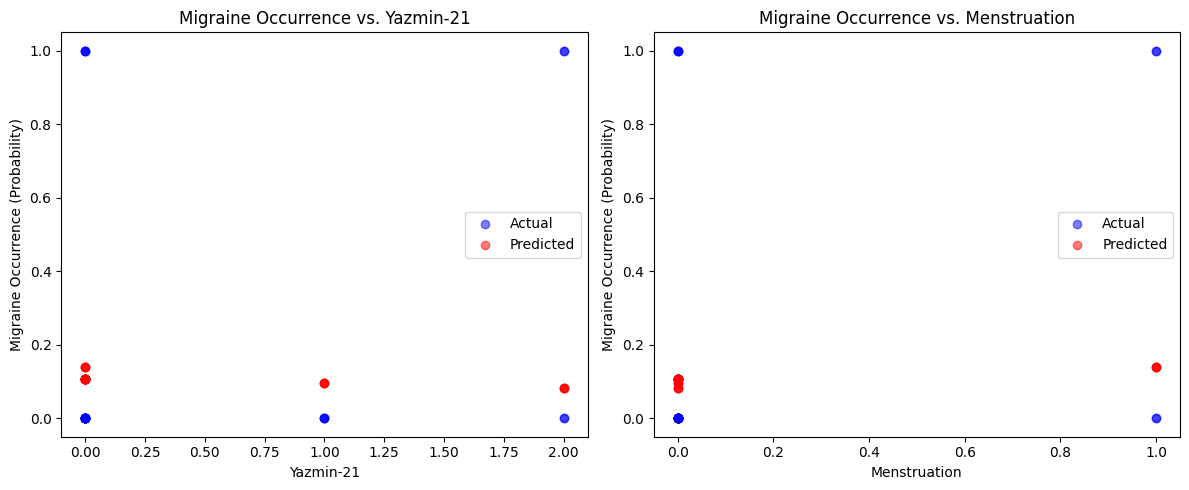

In [33]:
# Plotting the relationship between Migraine Occurrence and Yazmin-21
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test['Yazmin-21'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['Yazmin-21'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Migraine Occurrence vs. Yazmin-21')
plt.xlabel('Yazmin-21')
plt.ylabel('Migraine Occurrence (Probability)')
plt.legend()

# Plotting the relationship between Migraine Occurrence and Menstruation
plt.subplot(1, 2, 2)
plt.scatter(X_test['Menstruation'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['Menstruation'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Migraine Occurrence vs. Menstruation')
plt.xlabel('Menstruation')
plt.ylabel('Migraine Occurrence (Probability)')
plt.legend()

plt.tight_layout()
plt.show()